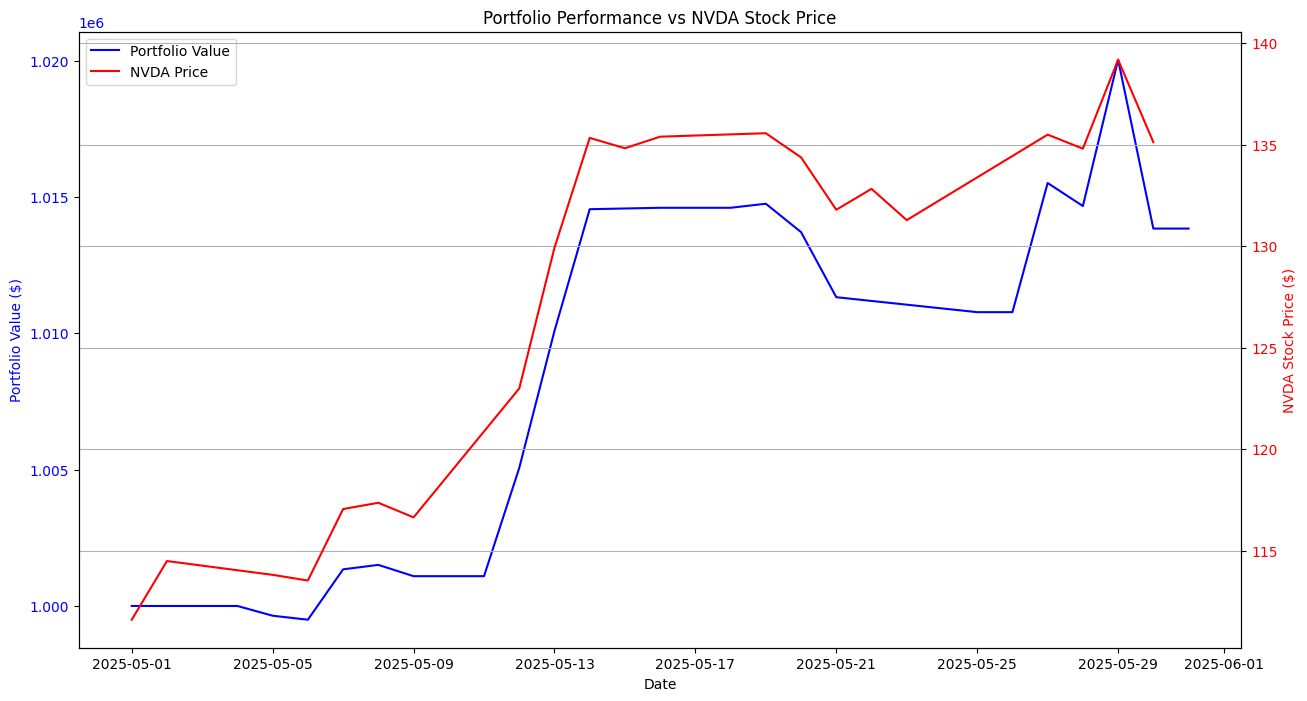

Initial Portfolio Value: $1,000,000.00
Final Portfolio Value: $1,013,839.26
Total Return: 1.38%


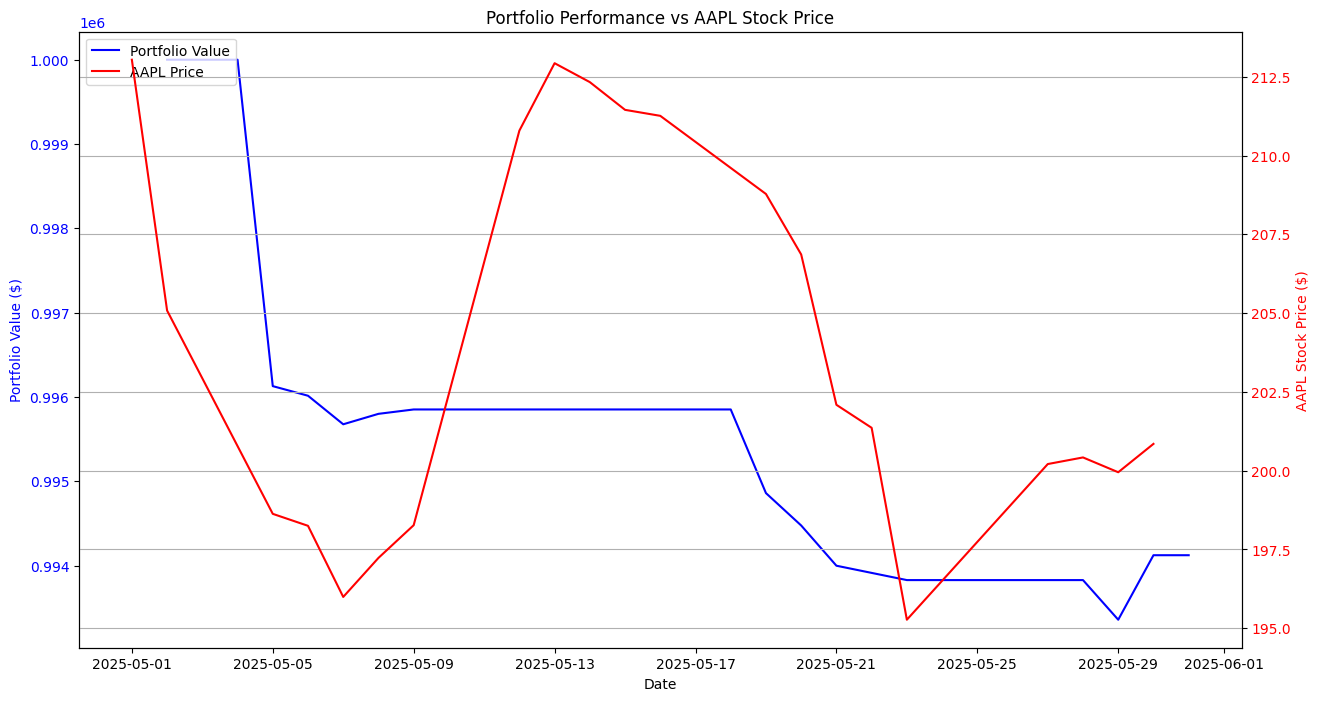

Initial Portfolio Value: $1,000,000.00
Final Portfolio Value: $994,123.95
Total Return: -0.59%


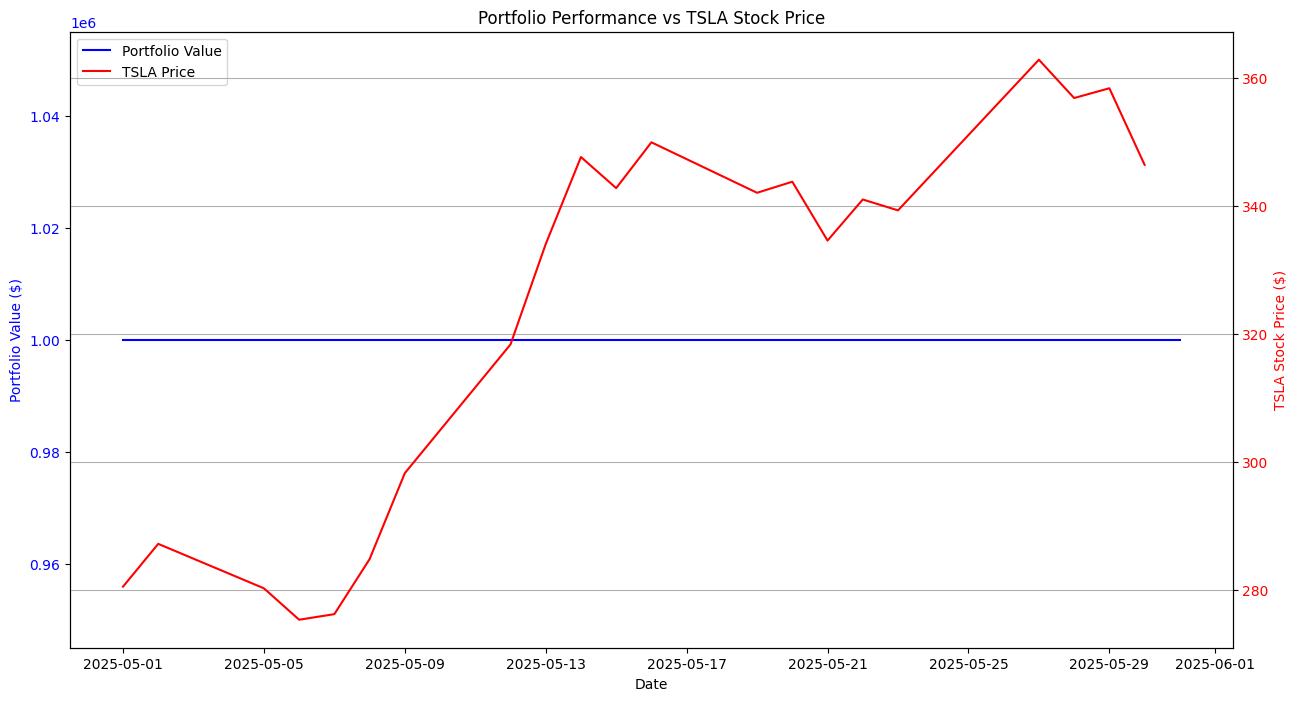

Initial Portfolio Value: $1,000,000.00
Final Portfolio Value: $1,000,000.00
Total Return: 0.00%


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

def plot_portfolio_vs_stock(ticker, performance_path, prices_path):
    """
    Plot portfolio performance against a specific stock's price movement.
    
    Parameters:
    -----------
    ticker : str
        The stock ticker symbol (e.g., 'NVDA', 'AAPL')
    performance_path : str
        Path to the performance CSV file
    prices_path : str
        Path to the prices CSV file containing stock data
    """
    # Read the data
    performance_df = pd.read_csv(performance_path)
    prices_df = pd.read_csv(prices_path)
    
    # Filter for specific ticker prices and create a copy
    stock_prices = prices_df[prices_df['symbol'] == ticker].copy()
    
    # Convert dates to datetime
    performance_df.loc[:, 'date'] = pd.to_datetime(performance_df['date'])
    stock_prices.loc[:, 'date'] = pd.to_datetime(stock_prices['date'])
    
    # Create figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(15, 8))
    ax2 = ax1.twinx()
    
    # Plot portfolio value
    line1 = ax1.plot(performance_df['date'], performance_df['net_worth'], 
                     color='blue', label='Portfolio Value')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Portfolio Value ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot stock price
    line2 = ax2.plot(stock_prices['date'], stock_prices['close'], 
                     color='red', label=f'{ticker} Price')
    ax2.set_ylabel(f'{ticker} Stock Price ($)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    
    plt.title(f'Portfolio Performance vs {ticker} Stock Price')
    plt.grid(True)
    plt.show()
    
    # Calculate and display performance metrics
    initial_value = 1000000  # $1M starting value
    final_value = performance_df['net_worth'].iloc[-1]
    total_return = (final_value - initial_value) / initial_value * 100
    
    print(f"Initial Portfolio Value: ${initial_value:,.2f}")
    print(f"Final Portfolio Value: ${final_value:,.2f}")
    print(f"Total Return: {total_return:.2f}%")

plot_portfolio_vs_stock(
    ticker='NVDA',
    performance_path="NVDA/performance.csv",
    prices_path="../../experiments/prices.csv"
)

plot_portfolio_vs_stock(
    ticker='AAPL',
    performance_path="AAPL/performance.csv",
    prices_path="../../experiments/prices.csv"
)

plot_portfolio_vs_stock(
    ticker='TSLA',
    performance_path="TSLA/performance.csv",
    prices_path="../../experiments/prices.csv"
)